#### TASK 3: Visualize Feature Importance in a Model 

#### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


#### Load Datasets(Titanic dataset)

In [3]:
# Load Titanic dataset from a public URL
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
print(df.head(3))


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  


#### Data Preprocessing

In [4]:
# Select relevant columns
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

# Drop missing values
df.dropna(inplace=True)

# Encode 'Sex' column (male=1, female=0)
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])


#####  Split Dataset (train_test_split)

In [5]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Train Random Forest Model

In [6]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


#### Extract and Visualize Feature Importances

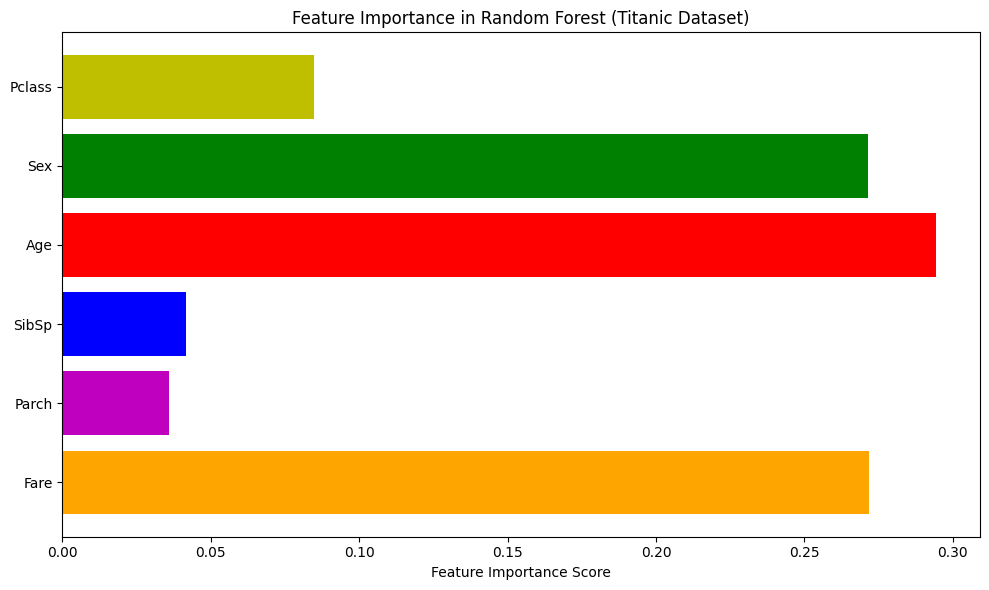

In [8]:
# Extract feature importances
importances = model.feature_importances_
features = X.columns

# Plot feature importances
plt.figure(figsize=(10,6))
plt.barh(features, importances, color= ["y","g","r","b","m","orange"])
plt.xlabel("Feature Importance Score")
plt.title("Feature Importance in Random Forest (Titanic Dataset)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


#### Testing

In [10]:
# Sample custom input (values must match feature order: Pclass, Sex, Age, SibSp, Parch, Fare)
# Example: 3rd class, male, 25 years old, no siblings/spouse, no parents/children, fare $7.25
custom_input = pd.DataFrame([[3, 1, 25.0, 0, 0, 7.25]], columns=X.columns)

# Predict survival
prediction = model.predict(custom_input)

# Interpret prediction
print("Prediction:", "Survived" if prediction[0] == 1 else "Did not survive")


Prediction: Did not survive


In [11]:
# Sample custom input (values must match feature order: Pclass, Sex, Age, SibSp, Parch, Fare)
# Example: 3rd class, male, 25 years old, no siblings/spouse, no parents/children, fare $7.25
custom_input = pd.DataFrame([[1, 0, 22, 0, 0, 100.0]], columns=X.columns)

# Predict survival
prediction = model.predict(custom_input)

# Interpret prediction
print("Prediction:", "Survived" if prediction[0] == 1 else "Did not survive")


Prediction: Survived
